##  SR timeserie over shapefile

In [7]:
import netCDF4
from netCDF4 import Dataset, num2date
import warnings
warnings.filterwarnings("ignore")
import datetime
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pylab as plt
import numpy as np
from carto import scale_bar

In [8]:
nc_fid=Dataset('K:/PROJETS/PROJET_FIRE_INDEX/ERA5_SR_Netcdf/ERA5_SR_Pessamit_SNOW_New_2018_from_3_to_8.nc','r')
data=nc_fid.variables['SR'][:].squeeze()
lons=nc_fid.variables['lon'][:].squeeze()
lats=nc_fid.variables['lat'][:].squeeze()
data.shape

(184, 77, 121)

On va tracer la journée du: 2018-08-01
153


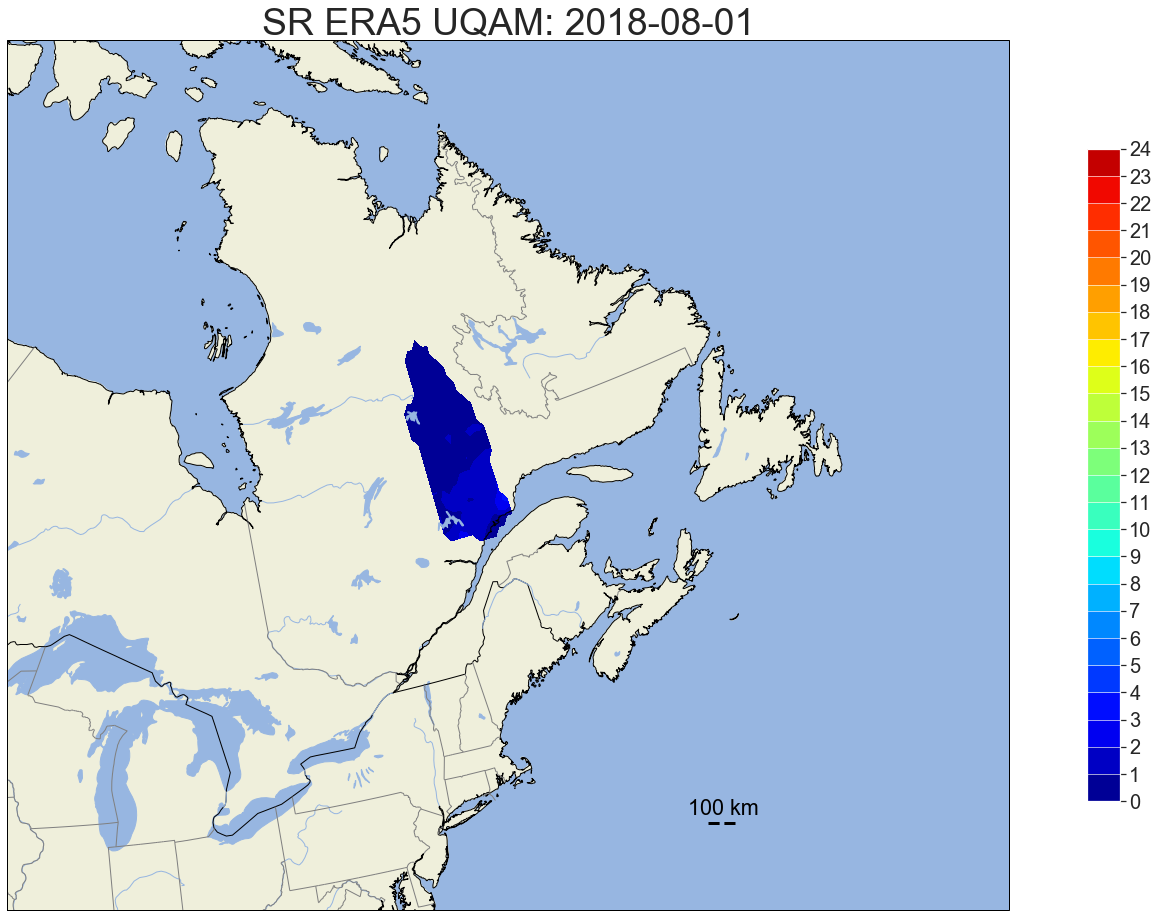

In [9]:
dset=Dataset('K:/PROJETS/PROJET_FIRE_INDEX/ERA5_SR_Netcdf/ERA5_SR_Pessamit_SNOW_New_2018_from_3_to_8.nc')
dtime = netCDF4.num2date(dset.variables['time'][:],dset.variables['time'].units)

# select a day to display
year = 2018 
month_to_find = 8
day_to_find = 1 

for index, item in enumerate(dtime):
    if (dtime[index].month == month_to_find and  dtime[index].day == day_to_find):
        index_to_find = index   
print('On va tracer la journée du: ' + dtime[index_to_find].strftime("%Y-%m-%d") )

## Lecture du fichier 
var=dset.variables['SR'][index_to_find][:]
lon=dset.variables['lon'][:]
lat=dset.variables['lat'][:]
time = dset.variables['time']
print(index_to_find)
fig = plt.figure(figsize=(28,16))
ax = plt.subplot(111, projection=ccrs.LambertConformal())
ax.set_extent([-90,-50,40,60])
   # ax.coastlines(resolution='110m');
ax.add_feature(cfeature.OCEAN.with_scale('50m'))      # couche ocean
ax.add_feature(cfeature.LAND.with_scale('50m'))       # couche land
ax.add_feature(cfeature.LAKES.with_scale('50m'))      # couche lac    
ax.add_feature(cfeature.BORDERS.with_scale('50m'))    # couche frontieres
ax.add_feature(cfeature.RIVERS.with_scale('50m'))     # couche rivières 
coast = cfeature.NaturalEarthFeature(category='physical', scale='10m',     # ajout de la couche cotière 
                        facecolor='none', name='coastline')
ax.add_feature(coast, edgecolor='black')

  
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')

ax.add_feature(states_provinces, edgecolor='gray')

## Choisissons une colormap
cmap0=plt.cm.jet
cmap0.set_under('darkblue') ## on met en blanc les valeurs inferieures au min de clev
cmap0.set_over('darkred') ## bleu fonce pour les valeurs extremes de pluie

mm = ax.contourf(lon,\
                   lat,\
                   var,\
                   vmin=0,\
                   vmax=25, \
                   transform=ccrs.PlateCarree(),\
                   levels=np.arange(0, 25, 1.),\
                   cmap=cmap0 )

  #  ax.stock_img();
mtl_lon, mtl_lat = -73.5, 45.5

# Define gridline locations and draw the lines using cartopy's built-in gridliner:
xticks = np.arange(-150.0,-40.0,20)
yticks =np.arange(10,80,10)

fig.canvas.draw()

# Standard 6,000 km scale bar.
scale_bar(ax, (0.70, 0.1), 100 ,plot_kwargs = dict(linestyle='dashed', color='black'))
cbar = plt.colorbar(mm,  shrink=0.75, drawedges='True', ticks=np.arange(0, 25.1, 1.), extend='both')
cbar.ax.tick_params(labelsize=20) 

string_title=u'SR ERA5 UQAM: '+dtime[index_to_find].strftime("%Y-%m-%d") 
plt.title(string_title, size='xx-large')
plt.savefig('./figures/SR_'+dtime[index_to_find].strftime("%Y-%m-%d")+'.png', bbox_inches='tight', pad_inches=0.1)
plt.show()  
plt.close()

### Mean over longitude

In [11]:
file = 'K:/PROJETS/PROJET_FIRE_INDEX/ERA5_SR_Netcdf/ERA5_SR_QC_SNOW_New_'
multi_file = [f'{file}{year}_from_3_to_8.nc' for year in range(2018,2019,1)]
fwi_dataset = xr.open_mfdataset(multi_file)
fwi_dataset



<xarray.Dataset>
Dimensions:  (lat: 77, lon: 121, time: 184)
Coordinates:
  * time     (time) datetime64[ns] 2018-03-01 2018-03-02 ... 2018-08-31
  * lon      (lon) float64 -84.0 -83.75 -83.5 -83.25 ... -54.5 -54.25 -54.0
  * lat      (lat) float32 62.0 61.75 61.5 61.25 61.0 ... 43.75 43.5 43.25 43.0
Data variables:
    SR       (time, lat, lon) float64 dask.array<chunksize=(184, 77, 121), meta=np.ndarray>

In [13]:
file = 'K:/PROJETS/PROJET_FIRE_INDEX/ERA5_SR_Netcdf/ERA5_SR_QC_SNOW_New_'
multi_file = [f'{file}{year}_from_3_to_8.nc' for year in range(2018,2019,1)]
fwi_dataset = xr.open_mfdataset(multi_file)
df = fwi_dataset.SR.mean(dim=('lon'))
df

<xarray.DataArray 'SR' (time: 184, lat: 77)>
dask.array<mean_agg-aggregate, shape=(184, 77), dtype=float64, chunksize=(184, 77)>
Coordinates:
  * time     (time) datetime64[ns] 2018-03-01 2018-03-02 ... 2018-08-31
  * lat      (lat) float32 62.0 61.75 61.5 61.25 61.0 ... 43.75 43.5 43.25 43.0

In [10]:
file = 'K:/PROJETS/PROJET_FIRE_INDEX/ERA5_SR_Netcdf/ERA5_SR_QC_SNOW_New_'
multi_file = [f'{file}{year}_from_3_to_8.nc' for year in range(2018,2019,1)]
fwi_dataset = xr.open_mfdataset(multi_file)

df = fwi_dataset.SR.mean(dim=('lon')).to_dataframe("SR").dropna(how='all')
df_pivot = df.pivot_table(values='SR',index='lat',columns=['time'])
df_pivot.columns = df_pivot.columns.strftime("%Y%m%d")
df_pivot = df_pivot.apply(lambda x: np.where(x < 0,np.nan,x))
# To find the cumulative sum 
df_pivot = df_pivot.cumsum(axis = 1) 

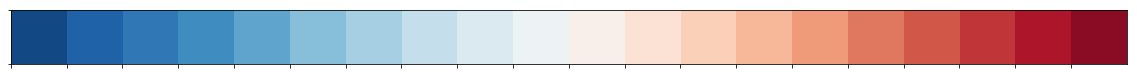

In [5]:
import seaborn as sns
diverging_colors = sns.color_palette("RdBu_r", 20)
sns.palplot(diverging_colors)

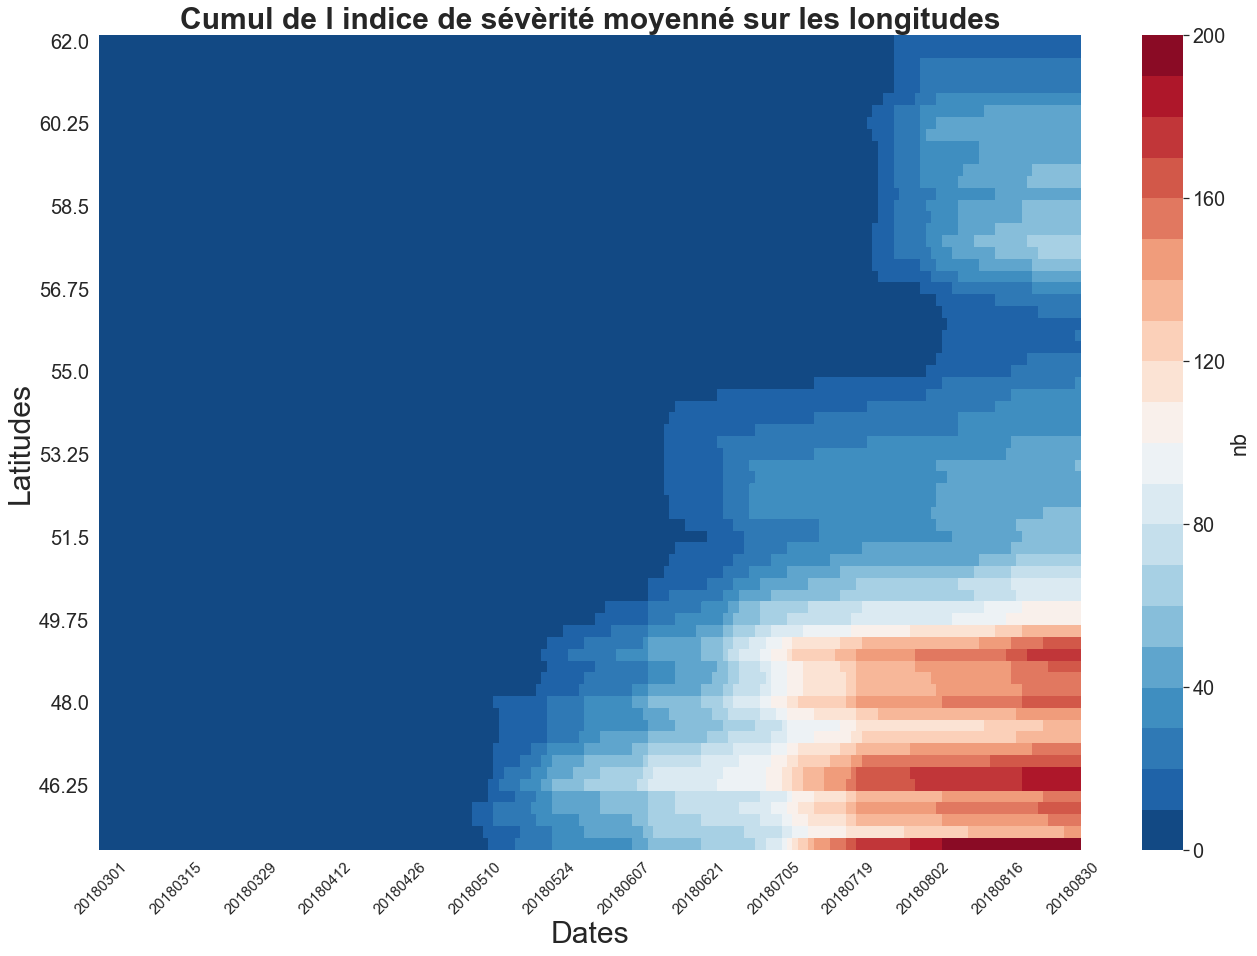

In [6]:
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.ndimage.filters import gaussian_filter
sns.set(font_scale=1.8)

ax = plt.axes()
sns.heatmap(df_pivot[::-1], cmap=diverging_colors,  ax = ax,vmin=0, vmax=200, cbar_kws={'label': 'nb'})
ax.set_title('Cumul de l indice de sévèrité moyenné sur les longitudes', weight='bold', fontsize=30)
ax.set_xlabel("Dates",fontsize=30)
ax.set_ylabel("Latitudes",fontsize=30)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    
plt.xticks(rotation=45)
  
figure = ax.get_figure()    
figure.set_size_inches(22, 15) 
plt.savefig('./figures/SR_Mean_over_longitude_timeserie_2018.png', bbox_inches='tight', pad_inches=0.1)

plt.show()

### Mean over latitude  and longitude 

In [10]:
df1 = fwi_dataset.SR.min(dim=('lon','lat')).to_dataframe("SR").dropna(how='all')
df2 = fwi_dataset.SR.mean(dim=('lon','lat')).to_dataframe("SR").dropna(how='all')
df3 = fwi_dataset.SR.max(dim=('lon','lat')).to_dataframe("SR").dropna(how='all')

df2 = df2.apply(lambda x: np.where(x <0.5,0,x))
df4 = df2.cumsum()

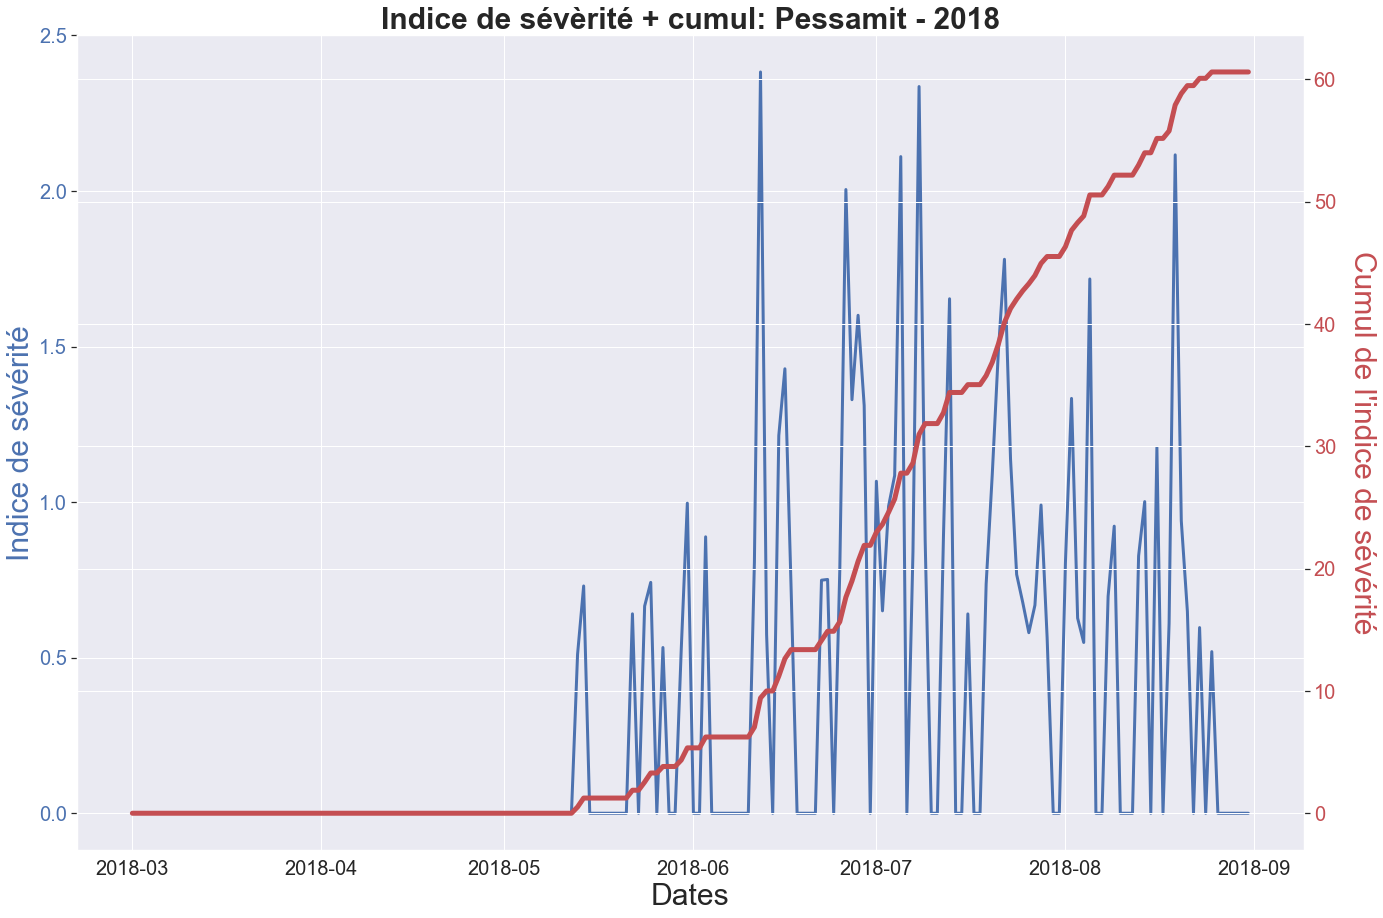

In [11]:
ax = plt.axes()
ax = sns.lineplot(x=df3.index, y="SR", data=df2,linewidth=3)
ax2 = plt.twinx()
x = sns.lineplot(x=df4.index, y="SR", color="r", data=df4,ax=ax2,linewidth=5 )
ax.set_title('Indice de sévèrité + cumul: Pessamit - 2018', weight='bold', fontsize=30)
ax.set_xlabel("Dates",fontsize=30)
ax.set_ylabel("Indice de sévérité",fontsize=30, color = 'b')

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
    tick.label.set_color('b')
    
ax2.set_ylabel("Cumul de l'indice de sévérité",fontsize=30, color = 'r', rotation=-90, labelpad=40)
for tl in ax2.get_yticklabels():
    tl.set_color('r') 
    tl.set_fontsize(20)
    
figure = ax.get_figure()    
figure.set_size_inches(22, 15) 
plt.savefig('./figures/SR_CumulSR_latlon_timeserie_2018.png', bbox_inches='tight', pad_inches=0.1)
plt.show()

In [203]:
dataframe_stations = pd.read_csv("K:/PROJETS/PROJET_FIRE_INDEX/database_stations/Stations_In_curr_Shapefile_FWI_SOPFEU2018.csv", encoding='latin-1')
dataframe_stations = dataframe_stations.set_index('Date')

i = 0 
for column in dataframe_stations:
    dataframe_stations[column] = dataframe_stations[column].loc[ERA5_Onset['Date'][i].strftime('%Y-%m-%d'):'2018-08-31']
    i+=1

NameError: name 'ERA5_Onset' is not defined